In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# TODO: Expedite reading/joining of several csv files
df = pd.read_csv("interlagos2.csv", header = 0)

In [7]:
df["worst_tire_wear"] = df[[f"tire_wear{i}" for i in range(1, 5)]].min(axis = 1, )
df["delta_tire_wear"] = df["worst_tire_wear"].diff()
df["fuel_consumption"] = df["fuel"].diff()

In [8]:
df.head()

,time,fuel,tire_wear1,tire_wear2,tire_wear3,tire_wear4,worst_tire_wear,delta_tire_wear,fuel_consumption
1,0,97.71,99.96,99.96,99.98,99.98,99.96,NaN,NaN
2,115512,95.15,99.91,99.89,99.96,99.95,99.89,-0.07,-2.56
3,95787,92.63,99.86,99.83,99.93,99.93,99.83,-0.06,-2.52
4,93698,90.10,99.79,99.73,99.90,99.88,99.73,-0.10,-2.53
5,101180,87.53,99.74,99.67,99.87,99.85,99.67,-0.06,-2.57


In [10]:
def distplots(df):
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

    axes[0].plot(df["time"])
    axes[0].set_title("Distribution of lap times")
    #axes[0].set_xticks(rotation = 45)  # Need to generate new ticks to use

    axes[1].hist(df["delta_tire_wear"])
    axes[1].set_title("Distribution of tire wear")

    axes[2].hist(df["fuel_consumption"])
    axes[2].set_title("Distribution of fuel consumption")

plt.show()

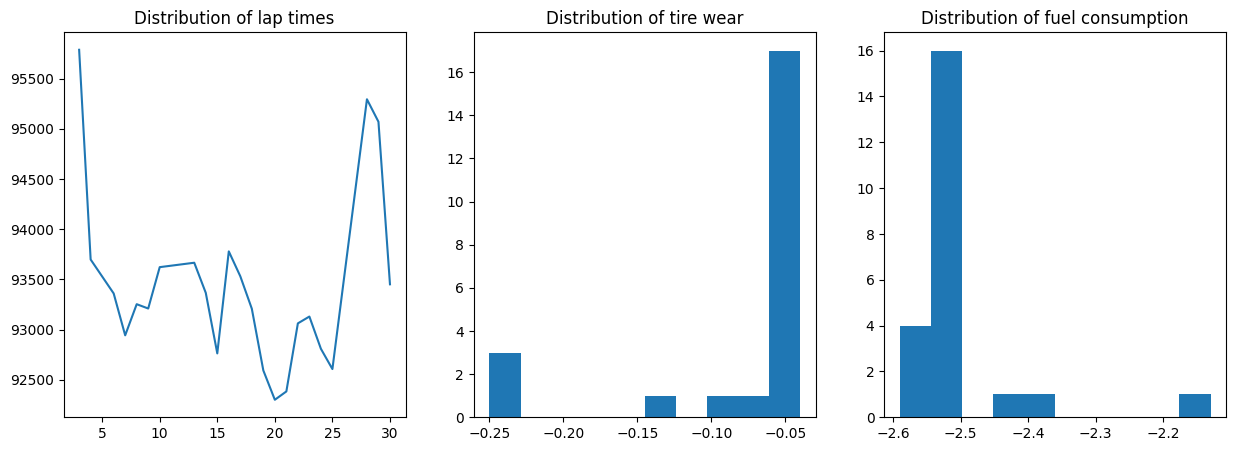

In [27]:
distplots(df[(df["time"] > 75000) & (df["time"] < 100000)])

In [25]:
df[df.delta_tire_wear < -0.2]

,time,fuel,tire_wear1,tire_wear2,tire_wear3,tire_wear4,worst_tire_wear,delta_tire_wear,fuel_consumption
27,191501,34.28,98.76,98.09,98.94,98.75,98.09,-0.25,-2.58
28,95294,31.78,98.72,97.86,98.88,98.68,97.86,-0.23,-2.50
29,95070,29.26,98.68,97.61,98.81,98.61,97.61,-0.25,-2.52
30,93451,26.83,98.65,97.36,98.75,98.55,97.36,-0.25,-2.43


In [28]:
df[(df["time"] > 75000) & (df["time"] < 100000)].time.mean()

np.float64(93429.86956521739)